# Introduction
I have sales data of 1 year monthwise saved in csv so i will try to merge and then analyze the whole year data and try to get insights from the it.

In [1]:
#import various libraries 
import pandas as pd  #pandas for data manipulation and other calculation stuff
import os  #for operating system 
import matplotlib.pyplot as plt #painter for my data 
from glob import glob # helps to merge all csv files

1. Merge all 12 months of sales data into a single CSV file

In [2]:
files = glob('D:/merged_partition_content/my_projects/Sales_Data/*')

In [3]:
#grouping them together
all_data = pd.concat((pd.read_csv(file) for file in files), ignore_index =True)

In [4]:
#after merge 
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


<h2> Cleaning section

In [5]:
#throwing nulls out
all_data.isna().sum()
all_data = all_data.dropna(how = 'all')
# getting an wholesum info about df
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372610 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 19.9+ MB


In [6]:
# while merging data i didnt thought that headers will also merge into it now while i was trying to create a new column for month it is throughing an error related to that and showing 'or' so im trying to drop repeating things out.
all_data= all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [9]:
#Adding a new column of month as int dtype
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month']= all_data['Month'].astype('int32')


In [15]:
# Adding a sales column
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float64')
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


<h3>1. What was the best month for sale?

In [18]:
results = all_data.groupby('Month').sum()

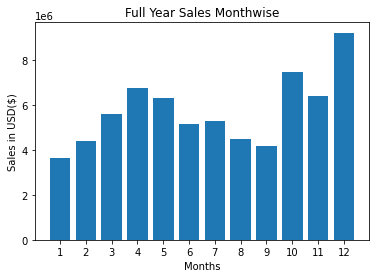

In [19]:
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD($)')
plt.title('Full Year Sales Monthwise')
plt.show()

<h3>2. Which city had the highest number of sales?

In [20]:
# Add a city column and spliting address from purchase address by ","
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
citywise_sale = all_data.groupby('City').sum()['Sales']

In [22]:
citywise_sale

City
 Atlanta          5.590997e+06
 Austin           3.639164e+06
 Boston           7.323284e+06
 Dallas           5.535951e+06
 Los Angeles      1.090514e+07
 New York City    9.328635e+06
 Portland         4.640981e+06
 San Francisco    1.652441e+07
 Seattle          5.495511e+06
Name: Sales, dtype: float64

<h3>3. What is the buying pattern of customers in 24 hours?

In [23]:
#Adding a time column in dataframe
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour']= all_data['Order Date'].dt.hour
all_data['Minutes'] = all_data['Order Date'].dt.minute

In [24]:
# all_data['Time'] = all_data['Order Date'].apply (lambda x: x.strftime('%H:%M'))

In [25]:
# time_wise_sales = all_data.groupby(['Time'])['Sales'].count()

# time_wise = pd.DataFrame(time_wise_sales, columns= ['Sales'])
# time_wise

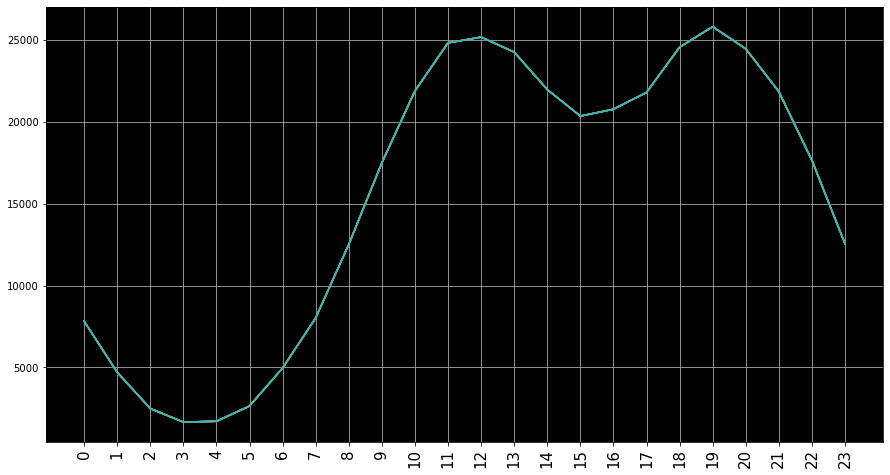

In [51]:
#This plot shows all 24 hours graph and requestes order as per hour
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.figure(figsize=(15,8))
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.rcParams['axes.facecolor'] = 'k'
plt.xticks(rotation ='vertical', size =15)
plt.grid(True)
plt.xticks(hours)
plt.show()

<h3> 4. What product Sold the most?

In [59]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]




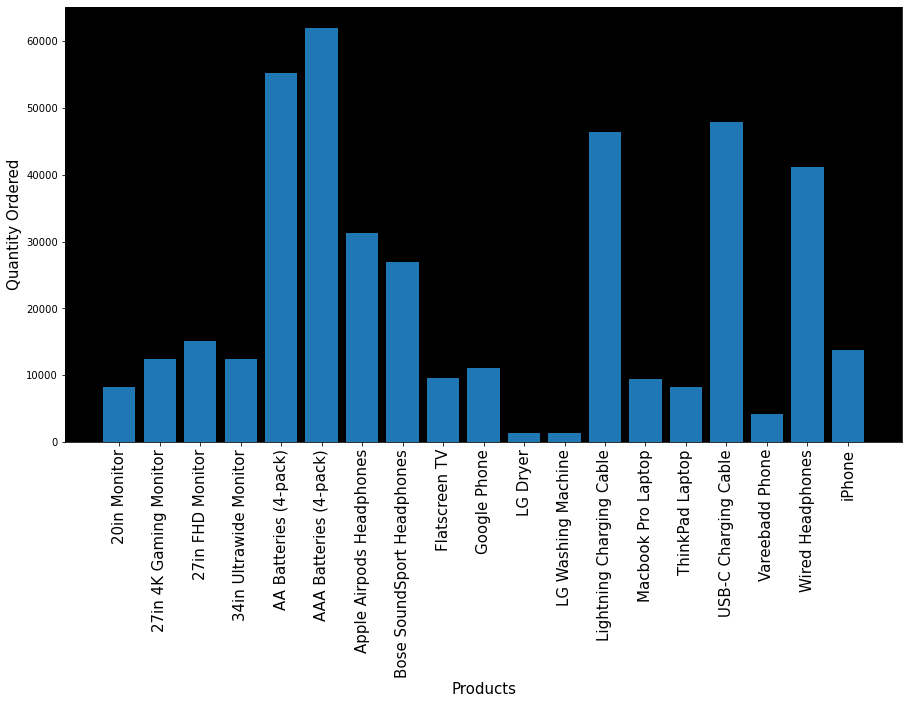

In [60]:
plt.figure(figsize= (15,8))
plt.rcParams['axes.facecolor'] = 'k'
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation ='vertical', size= 15)
plt.xlabel('Products', size= '15')
plt.ylabel('Quantity Ordered', size ='15')
plt.show()
